In [1]:
import scvelo as scv
import pandas as pd
import scanpy as sc

In [2]:

file = "mouseBM_with_velo.loom"
adata_loom = scv.read_loom(file)
adata_loom
file = "mouseBM.h5ad"
adata = scv.read(file)
adata_loom.obsm['X_wnn.umap'] = adata.obsm['X_wnn.umap']
s = scv.read("spliced.csv")
u = scv.read("unspliced.csv")
adata_loom.layers['spliced'] = s.X
adata_loom.layers['unspliced'] = u.X
adata_loom.obs['seurat_clusters'] = adata_loom.obs['seurat_clusters'].apply(lambda x:int(x))



In [5]:
adata_loom.obs['seurat_clusters'] = adata_loom.obs['seurat_clusters'].apply(lambda x:int(x)-1)


Trying to set attribute `.obs` of view, copying.


Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 20/64 cores)


  0%|          | 0/306 [00:00<?, ?gene/s]

    finished (0:01:06) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'velocity_wnn.umap', embedded velocity vectors (adata.obsm)


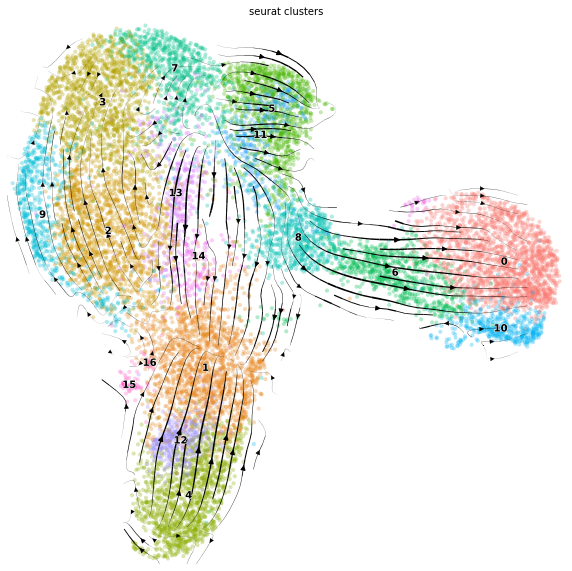

In [16]:
# marker genes

import pandas as pd

adata_no_murk = adata_loom.copy()

murk_genes = list(pd.read_csv('MURK.mouse.list',header=None)[0])
top20 = pd.read_csv("top1000.marker.tsv",sep=" ")
top20=top20[top20.cluster.isin([0,10,1,12,4])]
# top20.head()

list_no_murk =[gene for gene in top20.gene.unique() if gene not in murk_genes]
adata_no_murk = adata_no_murk[:,list_no_murk]


scv.pp.filter_and_normalize(adata_no_murk)
scv.pp.moments(adata_no_murk)
scv.tl.recover_dynamics(adata_no_murk, n_jobs = 20)
scv.tl.velocity(adata_no_murk,mode="dynamical")
scv.tl.velocity_graph(adata_no_murk,basis="X_wnn.umap")
colors = ['#F8766D','#E7851E','#D09400','#B2A100','#89AC00','#45B500','#00BC51','#00C087','#00C0B2','#00BCD6','#00B3F2','#29A3FF','#9C8DFF','#D277FF','#F166E8','#FF61C7','#FF689E']
cdict = {i:colors[i] for i in range(len(colors)) }
scv.pl.velocity_embedding_stream(adata_no_murk, basis="X_wnn.umap", color="seurat_clusters",figsize=(10,10),palette=cdict)


In [14]:
top20[top20.cluster.isin([1,2,3,4,5,6,7,8,9,11,12,13,14])]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
1001,0.000000,1.459172,0.990,0.930,0.0,1,H2afy
1002,0.000000,1.378230,0.979,0.497,0.0,1,Plac8
1003,0.000000,1.235191,0.736,0.191,0.0,1,Ccl9
1004,0.000000,1.195568,0.811,0.380,0.0,1,Lgals1
1005,0.000000,1.164201,0.910,0.374,0.0,1,Cd34
...,...,...,...,...,...,...,...
12210,0.006319,0.280295,0.698,0.642,1.0,14,Pim1
12211,0.007018,-0.270548,0.459,0.549,1.0,14,Ap3s1
12212,0.008749,-0.780786,0.270,0.362,1.0,14,Ctsg
12213,0.009696,-0.281652,0.692,0.768,1.0,14,Cyba


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
1,0.0,2.576598,0.987,0.295,0.0,0,Car1
2,0.0,2.363234,0.994,0.437,0.0,0,Blvrb
3,0.0,2.332729,0.984,0.339,0.0,0,C1qtnf12
4,0.0,1.894340,0.989,0.137,0.0,0,Ermap
5,0.0,1.877886,0.998,0.910,0.0,0,Prdx2
